## Предобработка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta
import warnings

In [2]:
#загрузка файла и вывод информации
mobile_sourсes = pd.read_csv('/datasets/mobile_soures.csv')
mobile_sourсes.info()
display(mobile_sourсes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [3]:
#загрузка файла и вывод информации
mobile_dataset = pd.read_csv('/datasets/mobile_dataset.csv')
mobile_dataset.info()
display(mobile_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [4]:
#изменение наименований столбцов
mobile_sourсes = mobile_sourсes.rename(columns={'userId': 'user_id'})
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})

In [5]:
#проверка уникальных категориальных значений
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [6]:
#проверка уникальных категориальных значений
mobile_dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Так как нам не известно, что представляет из себя каждое из значений search - объединим их. Также объединим события 'contacts_show' и 'show_contacts'.

In [7]:
#создадим список всех search
search = []
for i in mobile_dataset['event_name']:
    if 'search' in i:
        search.append(i)
search_list = set(search)
print(search_list)

{'search_7', 'search_2', 'search_4', 'search_6', 'search_1', 'search_5', 'search_3'}


In [8]:
# создаем общее событие search
mobile_dataset['event_name'].replace(to_replace=search_list, value= 'search', inplace=True) 
# создаем общее событие show_contacts
mobile_dataset.loc[mobile_dataset['event_name'] == 'contacts_show', 'event_name'] = 'show_contacts'
print(mobile_dataset['event_name'].unique())

['advert_open' 'tips_show' 'map' 'show_contacts' 'search' 'tips_click'
 'photos_show' 'favorites_add' 'contacts_call']


In [9]:
#проверим количество уникальных пользователей в таблице событий
mobile_dataset['user_id'].nunique()

4293

Количество уникальных пользователей в обеих таблицах одинаковое.

In [10]:
#проверка на явные и неявные дубликаты
mobile_sourсes.duplicated().sum(), mobile_dataset.duplicated().sum(), mobile_sourсes['user_id'].duplicated().sum()

(0, 0, 0)

In [11]:
#изменение формата столбца на datetime
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']) 

#создадим отдельно столбец с датой
mobile_dataset['dt'] = mobile_dataset['event_time'].dt.date
mobile_dataset['dt'] = pd.to_datetime(mobile_dataset['dt'])


mobile_dataset.info()
display(mobile_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   dt          74197 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 2.3+ MB


,event_time,event_name,user_id,dt
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07


**Вывод**: В таблицах исправлены наименования столбцов, формат столбца с датой, объединены события, которые обозначают одни действия. В таблицах нет дубликатов и пропущенных значений. Данные готовы к дальнейшему исследованию.

## Проведение исследовательского анализа данных

In [12]:
#найдем минимальную и максимальную даты gанных
date_min = mobile_dataset['event_time'].min()
date_max = mobile_dataset['event_time'].max()
print('Минимальная дата в датасете', date_min)
print('Максимальная дата в датасете', date_max)

Минимальная дата в датасете 2019-10-07 00:00:00.431357
Максимальная дата в датасете 2019-11-03 23:58:12.532487


Посмотрим разпределение количества уникальных пользователей по дням

Text(0, 0.5, 'Количество уникальных пользователей')

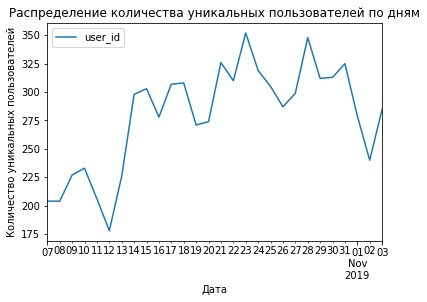

In [13]:
#количество уникальных пользователей по дням
count_user = mobile_dataset.groupby('dt')['user_id'].nunique().reset_index()
count_user.plot(x='dt', y='user_id')
plt.title('Распределение количества уникальных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')

Во второй половине месяца количество уникальных пользователей начинает расти, после чего закрепляется примерно в одном диапазоне. Распределение пользователей по дня не равномерное. Посмотрим зависит ли это от дня недели.

Text(0, 0.5, 'Количество уникальных пользователей')

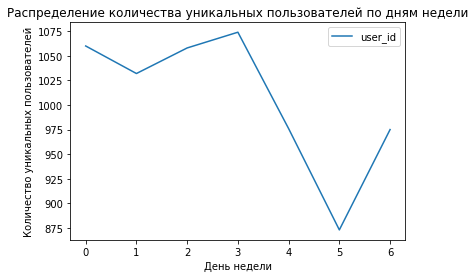

In [14]:
#количество уникальных пользователей по дням недели
day = mobile_dataset.copy()
day['day'] = day['dt'].dt.weekday
day.groupby('day')['user_id'].nunique().reset_index().plot(x='day', y='user_id')
plt.title('Распределение количества уникальных пользователей по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество уникальных пользователей')

Пользователи чаще заходят в приложение в будние дни. На субботу приходится минимальное количество уникальных пользователей.

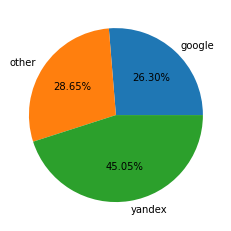

In [15]:
#посмотрим распределение пользователей по каналам
user_source = mobile_sourсes.groupby('source')['user_id'].count().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(user_source['user_id'], labels=user_source['source'], autopct='%1.2f%%')
plt.show()

In [16]:
#проведем статистическую проверку количества событий на пользователя методом describe
mobile_dataset_count = mobile_dataset.groupby('user_id').agg({'event_name': 'count'}).reset_index()
print(mobile_dataset_count['event_name'].describe())

display(mobile_dataset_count)

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: event_name, dtype: float64


,user_id,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,71
2,00463033-5717-4bf1-91b4-09183923b9df,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32
4,00551e79-152e-4441-9cf7-565d7eb04090,8
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,17
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7
4290,ffcf50d9-293c-4254-8243-4890b030b238,2
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,13


Среднее количество событий, приходящееся на пользователя - 17, при этом отклонение составляет 29, что говорит о наличии выбросов. Это подтверждает процентное распределение количества событий: min - 1 событие, max - 478 событий, медиана составляет 9 событий. Посмотрим распределение событий по полтзователям.

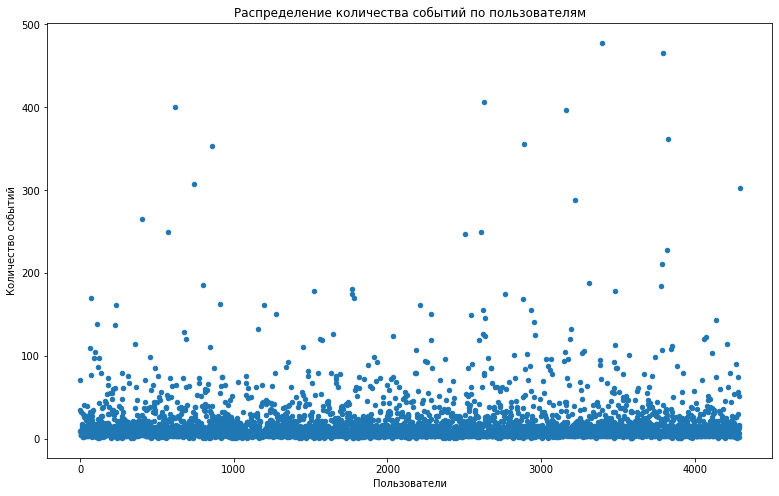

In [17]:
#построим график распредления количества событий по пользователям
mobile_dataset_count.reset_index().plot(x='index', y = 'event_name', kind='scatter', figsize=(13,8))
plt.title('Распределение количества событий по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество событий')
plt.show()

На графике видны выбросы. Построим график с их отсечением.

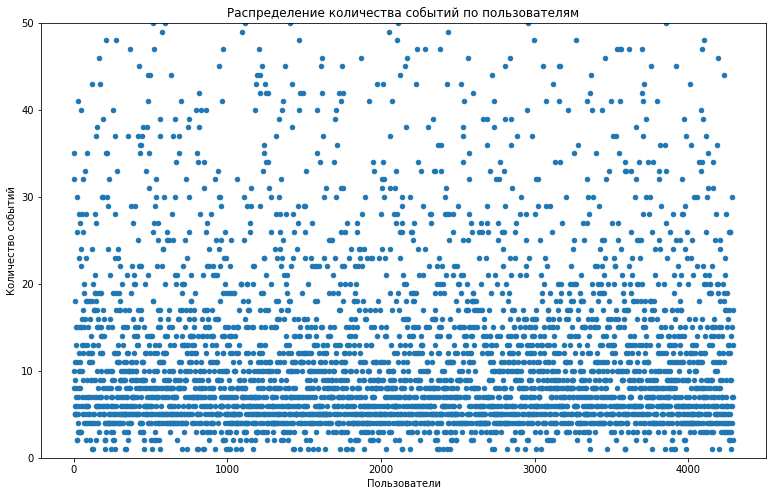

In [18]:
#построим график распредления количества событий по пользователям с изменение масштаба по оси y
mobile_dataset_count.reset_index().plot(x='index', y = 'event_name', kind='scatter', figsize=(13,8))
plt.title('Распределение количества событий по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество событий')
plt.ylim(0, 50)
plt.show()

Из графиков видно, что наибольшее количество пользователей совершают не более 15 действий за исследуемый нами период.
Посмотрим количество сессий, приходящееся на каждого пользователя. Возьмем за сессию события, между которыми не больше 20 мин.

In [19]:
#определить разницу 20 минут для каждой группы с кумулятивной суммой
mobile_dataset_copy = mobile_dataset.copy()
g = (mobile_dataset_copy.sort_values(['user_id', 'event_time']).groupby('user_id')['event_time'].diff() > pd.Timedelta('20Min')).cumsum()
#сздадим счетчик групп
mobile_dataset_copy['session_id'] = mobile_dataset_copy.groupby(['user_id', g], sort=False).ngroup() + 1
display(mobile_dataset_copy)

,event_time,event_name,user_id,dt,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2
...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03,10975
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958


Посмотрим количество сессий для каждого пользователя.

In [20]:
#количество сессий пользователя
count_session = mobile_dataset_copy.groupby('user_id')['session_id'].nunique().reset_index()
count_session

,user_id,session_id
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4
1,00157779-810c-4498-9e05-a1e9e3cedf93,8
2,00463033-5717-4bf1-91b4-09183923b9df,1
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,8
4,00551e79-152e-4441-9cf7-565d7eb04090,3
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,1
4290,ffcf50d9-293c-4254-8243-4890b030b238,1
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,3


In [21]:
#проведем статистическую проверку количества сессий на пользователя методом describe
count_session.describe()

,session_id
count,4293.000000
mean,2.556487
std,3.885942
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,111.000000


Как и в количестве событий в количестве сессий мы наблюдаем выбросы. Медианное значение количества сессий на пользователя в исследуемых данных - 1. Это очень низкий показатель, 50 % пользователей заходили в приложение всего один раз.
Посмотрим распределение на графике.

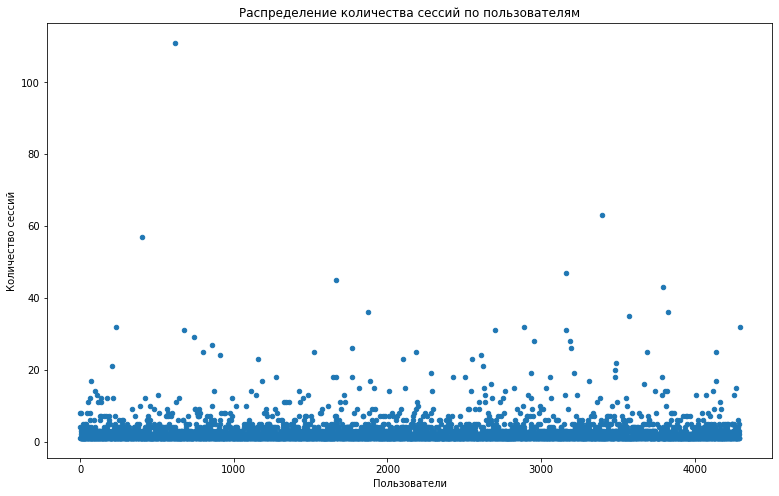

In [22]:
#строим график распределения количества сессий по пользователям
count_session.reset_index().plot(x='index', y = 'session_id', kind='scatter', figsize=(13,8))
plt.title('Распределение количества сессий по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество сессий')
plt.show()

На графике видны выбросы. Построим график с их отсечением.

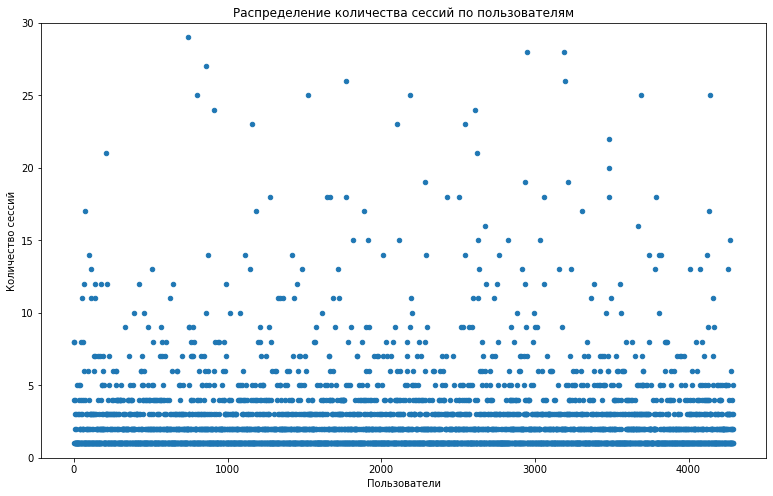

In [23]:
#строим график распределения количества сессий по пользователям с изменением масштаба оси y
count_session.reset_index().plot(x='index', y = 'session_id', kind='scatter', figsize=(13,8))
plt.title('Распределение количества сессий по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество сессий')
plt.ylim(0, 30)
plt.show()

У большинства пользователей не более 3 сессий за исследуемый период.

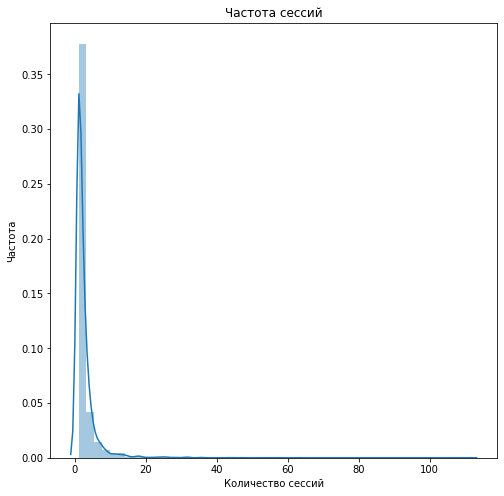

In [24]:
warnings.filterwarnings("ignore")
#построим гистограмму
plt.figure(figsize=(8, 8))
sns.distplot(count_session['session_id'])
plt.title('Частота сессий')
plt.xlabel('Количество сессий')
plt.ylabel('Частота')
plt.show()

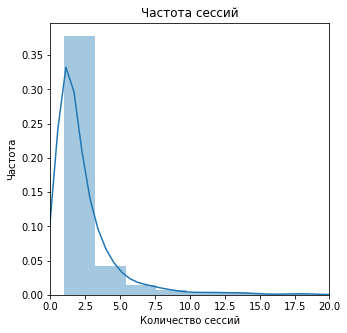

In [25]:
#построим гистограмму c измененным масштабом по оси х
plt.figure(figsize=(5, 5))
sns.distplot(count_session['session_id'])
plt.title('Частота сессий')
plt.xlabel('Количество сессий')
plt.ylabel('Частота')
plt.xlim(0, 20)
plt.show()

Так как исследуемый период составляет примерно месяц, полученное в ходе исследования количество сессий соответствует предполагаемому. Если пользователь быстро находит необходимое, нет причин часто пользоваться приложением. Проверим теорию по удовлетворению потребностей пользователя далее.

Посмотрим среднее количество действий пользователя за сессию, примем, что это стандартное поведение пользователя.

In [26]:
#найдем количество действий для каждой сессии
session = mobile_dataset_copy.pivot_table(index=['user_id', 'session_id'], values='event_name', aggfunc='count').reset_index()
display(session.head(10))

,user_id,session_id,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,86,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,769,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5185,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5364,8
4,00157779-810c-4498-9e05-a1e9e3cedf93,4394,9
5,00157779-810c-4498-9e05-a1e9e3cedf93,4715,14
6,00157779-810c-4498-9e05-a1e9e3cedf93,4734,4
7,00157779-810c-4498-9e05-a1e9e3cedf93,6304,9
8,00157779-810c-4498-9e05-a1e9e3cedf93,8830,11
9,00157779-810c-4498-9e05-a1e9e3cedf93,8844,9


In [27]:
#найдем максимальное количество действий для каждого пользователя
session_count = session.groupby('user_id')['event_name'].mean().round().reset_index()
session_count = session_count.rename(columns = {'event_name': 'mean'})
display(session_count)

,user_id,mean
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,9.0
1,00157779-810c-4498-9e05-a1e9e3cedf93,9.0
2,00463033-5717-4bf1-91b4-09183923b9df,10.0
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.0
4,00551e79-152e-4441-9cf7-565d7eb04090,3.0
...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,8.0
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7.0
4290,ffcf50d9-293c-4254-8243-4890b030b238,2.0
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,4.0


In [28]:
session_count.describe()

,mean
count,4293.000000
mean,7.923829
std,7.997904
min,1.000000
25%,4.000000
50%,6.000000
75%,9.000000
max,104.000000


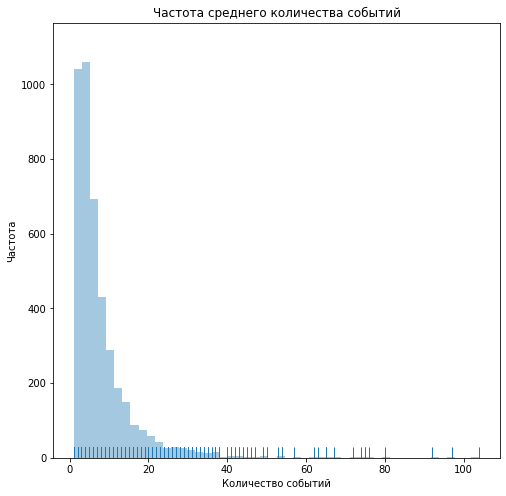

In [29]:
#построим гистограмму максимального количества событий в сессию
plt.figure(figsize=(8, 8))
sns.distplot(session_count['mean'], kde=False, rug = True)
plt.title('Частота среднего количества событий')
plt.xlabel('Количество событий')
plt.ylabel('Частота')
plt.show()

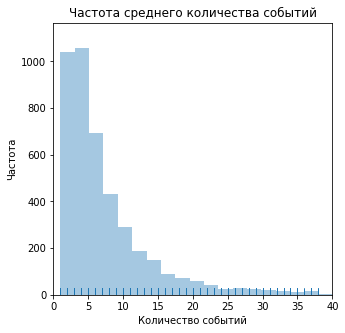

In [30]:
#построим гистограмму максимального количества событий в сессию с изменение масштаба по оси х
plt.figure(figsize=(5, 5))
sns.distplot(session_count['mean'], kde=False, rug = True)
plt.title('Частота среднего количества событий')
plt.xlabel('Количество событий')
plt.ylabel('Частота')
plt.xlim(0, 40)
plt.show()

Основное количество пользователей совершает не более 15 событий за сессию.

**Вывод**
На основе проведенного исследования разделим пользователей на 3 категории по среднему количеству событий за сессиию в соответствии с квартилями: А - < 4 события  (25% пользователей), В - 4-8 событий (50% пользователей - основная группа), С - > 9 событий (25% пользователей).

## Сегменация пользователей на основе проведенного анализа

In [31]:
#присвоим пользователям категории
def category(mean):
    if mean < 4:
        return 'A'
    if mean <= 9:
        return 'B'
    return 'C'
session_count['category'] = session_count['mean'].apply(category)
display(session_count)

,user_id,mean,category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,9.0,B
1,00157779-810c-4498-9e05-a1e9e3cedf93,9.0,B
2,00463033-5717-4bf1-91b4-09183923b9df,10.0,C
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,4.0,B
4,00551e79-152e-4441-9cf7-565d7eb04090,3.0,A
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,8.0,B
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,7.0,B
4290,ffcf50d9-293c-4254-8243-4890b030b238,2.0,A
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,4.0,B


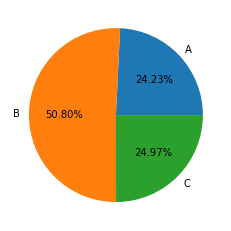

In [32]:
#посмотрим распределение по группам в процентах
user_count = session_count.groupby('category')['user_id'].count().reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(user_count['user_id'], labels=user_count['category'], autopct='%1.2f%%')
plt.show()

Из графика видно, что по количеству пользователей группы распределены корректно. Как мы и рассчитывали.

In [33]:
#добавим в таблицу с событиями категории
mobile_dataset_copy = mobile_dataset_copy.merge(session_count[['user_id', 'category']], how='left', on='user_id')
display(mobile_dataset_copy)

,event_time,event_name,user_id,dt,session_id,category
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2,C
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2,C
...,...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03,10975,B
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C


## Оценка метрик

Для полученных групп оценим необходимые метрики.

### Retention rate

In [34]:
#найдем первое действие за исследуемый период
first_ts = mobile_dataset_copy.groupby('user_id').agg({'event_time': min}).reset_index()
first_ts = first_ts.rename(columns = {'event_time': 'first_ts'})
mobile_dataset_first = mobile_dataset_copy.merge(first_ts)
display(mobile_dataset_first)

,event_time,event_name,user_id,dt,session_id,category,first_ts
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C,2019-10-07 00:00:00.431357
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C,2019-10-07 00:00:00.431357
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C,2019-10-07 00:00:00.431357
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C,2019-10-07 00:00:00.431357
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C,2019-10-07 00:00:00.431357
...,...,...,...,...,...,...,...
74192,2019-11-03 23:46:47.068179,map,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,10973,B,2019-11-03 23:46:47.068179
74193,2019-11-03 23:46:58.914787,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,10973,B,2019-11-03 23:46:47.068179
74194,2019-11-03 23:47:01.232230,tips_show,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,10973,B,2019-11-03 23:46:47.068179
74195,2019-11-03 23:47:47.475102,advert_open,d157bffc-264d-4464-8220-1cc0c42f43a9,2019-11-03,10973,B,2019-11-03 23:46:47.068179


In [35]:
mobile_dataset_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   dt          74197 non-null  datetime64[ns]
 4   session_id  74197 non-null  int64         
 5   category    74197 non-null  object        
 6   first_ts    74197 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 4.5+ MB


In [36]:
observation_date = datetime(2019, 11, 4).date()  # момент анализа
horizon_days = 7  # горизонт анализа 

In [37]:
# функция для расчёта удержания

def get_retention(
    profiles,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [38]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [39]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]


    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(1, 2, 1)
    retention.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax2 = plt.subplot(1, 2, 2)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name 
        for name in retention_history.index.names
        if name not in ['dt']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [40]:
#построим таблицу удержания по группам
dimensions = ['category']

retention_raw, retention_grouped, retention_history = get_retention(
    mobile_dataset_first, observation_date, horizon_days, dimensions=dimensions
)

retention_grouped

,cohort_size,0,1,2,3,4,5,6
category,,,,,,,,
A,910,1.0,0.171429,0.140659,0.112088,0.095604,0.082418,0.064835
B,1842,1.0,0.090662,0.071661,0.057003,0.040174,0.043974,0.045603
C,931,1.0,0.066595,0.055854,0.032223,0.031149,0.027927,0.025779


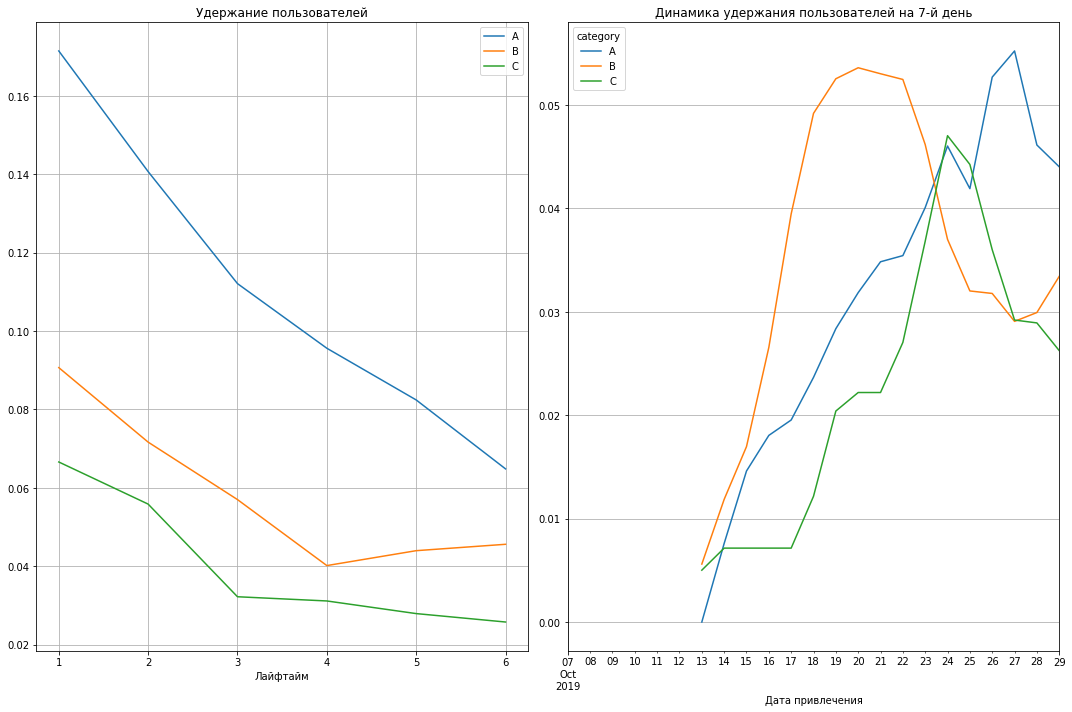

In [41]:
#построим график удержания и динамику удержания для групп
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Из графиков видно, что коэффициент удержания у группы А - пользователи, среднее количество действий за сессию которых минимальное, выше остальных групп на протяжение всего лайфтайма.

Во всех группах падает удержание пользователей, привлеченных во второй половине октября. Стоит проверить не было ли каких-нибудь технических изменений в приложении в этот период.

### Время, проведенное в приложении

In [42]:
#найдем время каждой сесии в минутах
time_in_app = mobile_dataset_copy.groupby('session_id').apply(lambda x: (x['event_time'].max() - x['event_time'].min()).total_seconds() / 60).reset_index()
time_in_app.columns = ['session_id', 'time']
display(time_in_app)

,session_id,time
0,1,18.708097
1,2,41.631163
2,3,28.249982
3,4,0.053947
4,5,40.808268
...,...,...
10970,10971,0.000000
10971,10972,5.508949
10972,10973,1.050324
10973,10974,0.000000


In [43]:
#добавим столбцы с категориями и пользователями
time_in_app = time_in_app.merge(mobile_dataset_copy[['user_id', 'category', 'session_id']], on='session_id').drop_duplicates()
display(time_in_app)

,session_id,time,user_id,category
0,1,18.708097,020292ab-89bc-4156-9acf-68bc2783f894,C
28,2,41.631163,cf7eda61-9349-469f-ac27-e5b6f5ec475c,C
53,3,28.249982,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,C
72,4,0.053947,d9b06b47-0f36-419b-bbb0-3533e582a6cb,A
74,5,40.808268,f32e1e2a-3027-4693-b793-b7b3ff274439,C
...,...,...,...,...
74184,10971,0.000000,d5e14ec3-7ae5-4598-ad36-f626b3ce24e3,A
74185,10972,5.508949,c10055f0-0b47-477a-869e-d391b31fdf8f,B
74190,10973,1.050324,d157bffc-264d-4464-8220-1cc0c42f43a9,B
74195,10974,0.000000,12681fdf-d1d1-454b-9b92-e8a3ccfaf07b,A


In [44]:
user_time = time_in_app.groupby('user_id')['time'].sum().reset_index()
user_time = user_time.merge(time_in_app[['user_id', 'category']]).drop_duplicates()
display(user_time)

,user_id,time,category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,46.009285,B
4,00157779-810c-4498-9e05-a1e9e3cedf93,146.006547,B
12,00463033-5717-4bf1-91b4-09183923b9df,24.707917,C
13,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,63.141022,B
21,00551e79-152e-4441-9cf7-565d7eb04090,9.327742,A
...,...,...,...
10936,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,49.420415,B
10938,ffc01466-fdb1-4460-ae94-e800f52eb136,0.868974,B
10939,ffcf50d9-293c-4254-8243-4890b030b238,1.339636,A
10940,ffe68f10-e48e-470e-be9b-eeb93128ff1a,38.876517,B


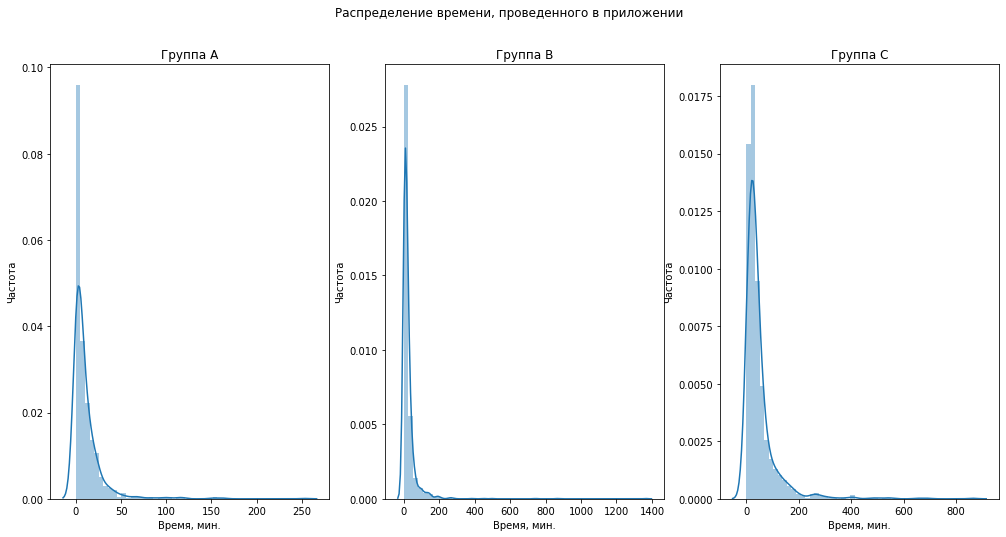

In [45]:
#построим гистограмму частоты проведенного в приложении времения по сессиям
fig, axes = plt.subplots(1, 3, figsize=(17,8))
b = 0
for i in sorted(time_in_app['category'].unique()):
    time_in_app_category = user_time.query('category == @i')
    sns.distplot(time_in_app_category['time'], ax = axes [b]).set(title=f'Группа {i}', ylabel='Частота', xlabel='Время, мин.')
   
    b += 1

fig.suptitle('Распределение времени, проведенного в приложении')
plt.show()

Text(0, 0.5, 'Время в приложении')

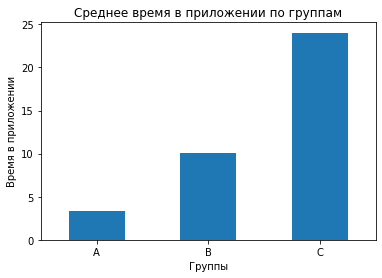

In [46]:
time_in_app.groupby('category')['time'].mean().plot(kind='bar', rot=0)
plt.title('Среднее время в приложении по группам')
plt.xlabel('Группы')
plt.ylabel('Время в приложении')

Посмотрим, как распределено количество сессий на пользователя в группах.

In [47]:
rasp = count_session.merge(session_count[['user_id', 'category']])
rasp

,user_id,session_id,category
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4,B
1,00157779-810c-4498-9e05-a1e9e3cedf93,8,B
2,00463033-5717-4bf1-91b4-09183923b9df,1,C
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,8,B
4,00551e79-152e-4441-9cf7-565d7eb04090,3,A
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2,B
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,1,B
4290,ffcf50d9-293c-4254-8243-4890b030b238,1,A
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,3,B


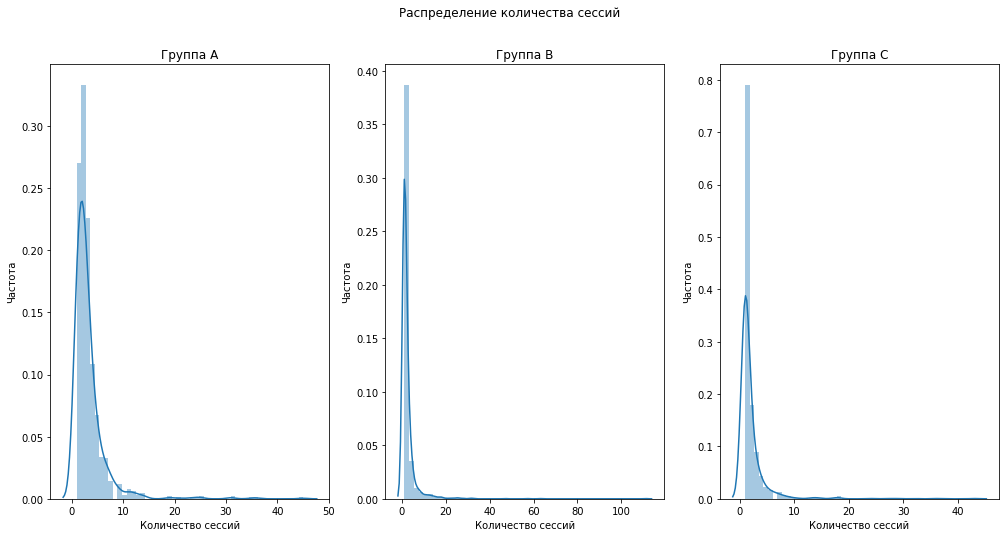

In [48]:
#построим гистограмму количества сессий
fig, axes = plt.subplots(1, 3, figsize=(17,8))
b = 0
for i in sorted(time_in_app['category'].unique()):
    rasp_category = rasp.query('category == @i')
    sns.distplot(rasp_category['session_id'], ax = axes [b]).set(title=f'Группа {i}', ylabel='Частота', xlabel='Количество сессий')
      
    b += 1
fig.suptitle('Распределение количества сессий')
plt.show()

**Вывод:** В группе С время, проведенное в приложении, наибольшее. Интересно, что хоть пользователи этой группы и проводят в приложении большое количество времени, они возвращаются в приложение реже остальных. Из графиков видим, что у большинства пользователей группы С только одна сессия. Это может говорить о том, что после длительного поиска пользователь разочаровывается в приложении.

### Частота действий

Рассчитаем совершение действия `show_contacts` относительно всех действий для каждой группы.

In [49]:
#найдем количество каждого действия по группам
freq = mobile_dataset_copy.pivot_table(index='event_name', columns='category', values='user_id', aggfunc='count').reset_index().rename_axis(None, axis=1)
display(freq)

,event_name,A,B,C
0,advert_open,209,1708,4247
1,contacts_call,161,283,97
2,favorites_add,195,639,583
3,map,301,1791,1789
4,photos_show,2239,4879,2894
5,search,1622,3525,1637
6,show_contacts,628,2084,1817
7,tips_click,75,380,359
8,tips_show,2200,15695,22160


[6    0.082307
Name: A, dtype: float64, 6    0.067261
Name: B, dtype: float64, 6    0.051064
Name: C, dtype: float64]


Text(0, 0.5, 'Частота')

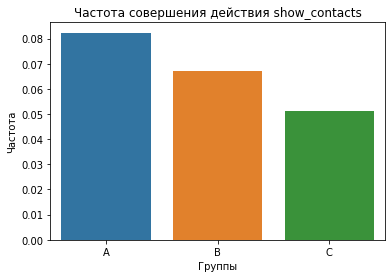

In [50]:
freq_new = freq.query('event_name == "show_contacts"')
freq_show = []

for cat in sorted(mobile_dataset_copy['category'].unique()):
    freque = freq_new[cat]/freq[cat].sum()
    freq_show.append(freque)
print(freq_show)
df = pd.DataFrame(freq_show).reset_index()
df.columns = ['category', 'frequency']
sns.barplot(data=df, x='category', y='frequency')
plt.title('Частота совершения действия show_contacts')
plt.xlabel('Группы')
plt.ylabel('Частота')

**Вывод:** График показывает, что наибольшая часота совершения действия show_contacts характерна для группы А. Это может объясняться тем, что эта группа имеет суммарно меньше всех действий относительно остальных групп.

### Конверсия в целевое действие — просмотр контактов

Исследуем, как отличается конверсия в действие show_contacts по группам. Посчитаем совершение действия show_contacts пользователями относительно числа уникальных пользователей.

In [51]:
#найдем количество уникальных пользователей по каждому действию
conversion = mobile_dataset_copy.pivot_table(index='event_name', columns='category', values='user_id', aggfunc='nunique').reset_index().rename_axis(None, axis=1)
display(conversion)

,event_name,A,B,C
0,advert_open,81,353,317
1,contacts_call,85,105,23
2,favorites_add,90,178,83
3,map,178,733,545
4,photos_show,398,544,153
5,search,405,856,405
6,show_contacts,258,475,248
7,tips_click,36,164,122
8,tips_show,455,1459,887


Пользователи группы C значительно чаще остальных (в процентном соотношении уникальных пользователей) просматривают и переходят на рекомендованные объявления и открывают карту размещения объявлений, но значительно меньше просматривают фото из объявления. Возможно для данных пользователей расположение предмета из объявления является основным показателем привлекательности.

Text(0, 0.5, 'Конверсия')

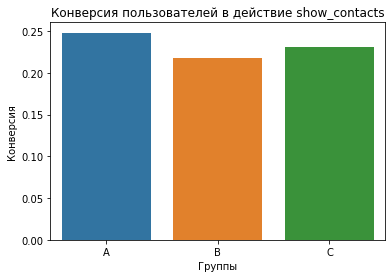

In [52]:
count_user = session_count.pivot_table(columns='category', values='user_id', aggfunc='nunique').reset_index().rename_axis(None, axis=1)
conversion_new = conversion.query('event_name == "show_contacts"')
conversion_show = []
for cat in sorted(mobile_dataset_copy['category'].unique()):
    count_users = mobile_dataset_copy.query('category == @cat').agg({'user_id': 'nunique'})
    conv = conversion_new[cat]/count_users[0]
    conversion_show.append(conv)
    
df_conv = pd.DataFrame(conversion_show).reset_index()
df_conv.columns = ['category', 'conversion']
sns.barplot(data=df_conv, x='category', y='conversion')
plt.title('Конверсия пользователей в действие show_contacts')
plt.xlabel('Группы')
plt.ylabel('Конверсия')

Наибольшую конверсию в целевое действие имеет группа А, также как и частоту совершения этого действия. При этом мы видим, что самая многочисленная группа, составляющая квартильный размах, имеет наименьшую конверсию.

### Различие во времени между распространенными событиями

Рассчитаем время между событиями `tips_show` (пользователь увидел рекомендованное сообщение) и `show_contacts` (пользователь посмотрел контакты одного из рекомендованных сообщений) в одной сессии. Проверим насколько хорошо работает алгоритм рекомендаций.

In [53]:
#находим пользователей совершивших одно из действий "tips_click", "show_contacts" или "tips_show"
time1 = mobile_dataset_copy.query('event_name in ["tips_click", "show_contacts", "tips_show"]')
display(time1.head(20))

,event_time,event_name,user_id,dt,session_id,category
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2,C
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
5,2019-10-07 00:01:19.993624,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2,C
7,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
10,2019-10-07 00:02:01.354436,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
11,2019-10-07 00:02:06.225301,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,2,C
12,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
14,2019-10-07 00:02:30.856380,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C
17,2019-10-07 00:03:02.305654,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,1,C


In [54]:
#найдем сессии в которых совершены все 3 действия
time2 = time1.pivot_table(index='event_name', columns='session_id', values='event_time', aggfunc='min').reset_index().rename_axis(None, axis=1)
time2 = time2.dropna(axis=1)
#создадим список сессий
col = time2.columns
#создадим таблицу с сессиями, в которых совершены все 3 действия
time3 = time1.query('session_id in @col')
time3

,event_time,event_name,user_id,dt,session_id,category
12,2019-10-07 00:02:07.374346,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
24,2019-10-07 00:05:16.003328,show_contacts,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
28,2019-10-07 00:06:01.349291,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
32,2019-10-07 00:06:56.367054,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
35,2019-10-07 00:09:24.585200,tips_show,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,2019-10-07,3,C
...,...,...,...,...,...,...
74191,2019-11-03 23:53:24.962860,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,10958,C


In [55]:
#найдем сессии, в которых действие show_contacts идет после tips_click
a = []
for i in time3['session_id'].unique():
    session = time3.query('session_id == @i').reset_index()
    for j in range(1, len(session)):
        if session.loc[j-1, 'event_name'] == 'tips_click' and session.loc[j, 'event_name'] == 'show_contacts':
            a.append(i)

In [56]:
#таблица с оставшимися сессиями
time4 = time3.query('session_id in @a')
display(time4)
time4['user_id'].nunique()

,event_time,event_name,user_id,dt,session_id,category
5386,2019-10-09 10:19:17.425058,tips_show,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5390,2019-10-09 10:19:49.061125,tips_click,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5391,2019-10-09 10:19:54.981493,tips_show,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5396,2019-10-09 10:20:48.720828,show_contacts,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5399,2019-10-09 10:22:25.819201,tips_click,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5401,2019-10-09 10:22:31.779342,tips_show,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5402,2019-10-09 10:22:49.827333,show_contacts,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5411,2019-10-09 10:24:29.363988,tips_click,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5412,2019-10-09 10:24:33.718640,show_contacts,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C
5413,2019-10-09 10:24:35.223573,tips_show,2aefc667-34b3-43f1-bd19-da65c4435bf1,2019-10-09,610,C


4

Проведенный анализ показывает неработоспособность алгоритма рекомендаций. Только 4 пользователя за одну сессию прошли путь "увидел рекомендованное объявление - открыл рекомендованное объявление - посмотрел контакты". 

## Проверка статистических гипотез

Для проверки гипотез используем t-test.

**Гипотеза 1**:

Нулевая гипотеза: конверсия в просмотры контактов пользователей, пришедших из google, такая же, как и у пользователей, пришедших из yandex.

Альтернативная гипотеза: группы демонстрируют разную конверсию.

In [57]:
#присоединим таблицу с каналами к таблицу с событиями
mobile_dataset_source = mobile_dataset.merge(mobile_sourсes, how = 'left')
display(mobile_dataset_source)
mobile_dataset_source.isna().sum() #проверим на пропуски

,event_time,event_name,user_id,dt,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,2019-10-07,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,2019-10-07,yandex
...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google
74194,2019-11-03 23:56:57.041825,search,20850c8f-4135-4059-b13b-198d3ac59902,2019-11-03,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,2019-11-03,google


event_time    0
event_name    0
user_id       0
dt            0
source        0
dtype: int64

In [58]:
#посчитаем количество пользователей из каждого канала
user_id = mobile_dataset_source.pivot_table(columns='source', values = 'user_id', aggfunc = 'nunique')
display(user_id)

source,google,other,yandex
user_id,1129,1230,1934


In [59]:
#найдем количество уникальных пользователей для целевого события
show_contact = (
    mobile_dataset_source
    .query('event_name == "show_contacts"')
    .pivot_table(index='event_name', columns='source', values = 'user_id', aggfunc = 'nunique')
    .reset_index()
    .rename_axis(None, axis=1)
)

display(show_contact)

,event_name,google,other,yandex
0,show_contacts,275,228,478


In [60]:
alpha = 0.01 #зададим критерий значимости
#создадим функцию для проверки гипотез о равенстве долей
def share(group_1=[], group_2=[]):
       
    do_user = np.array([show_contact[group_1], show_contact[group_2]])
    all_user = np.array([user_id[group_1], user_id[group_2]])

    p1 = do_user[0]/all_user[0]

    p2 = do_user[1]/all_user[1]

    p_combined = (do_user[0] + do_user[1])/(all_user[0] + all_user[1])

# разница пропорций в датасетах
    difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_user[0] + 1/all_user[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / all_user[0] + 1 / all_user[1])
        )

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if p_value < alpha:
        print(f'Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 
    print()

In [61]:
share('google', 'yandex')

p-значение:  [0.8244316]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



**Вывод:** Видим, что нет статистической разницы в конверсии между пользователями пришедшими из yandex и из google.

**Гипотеза 2**: 

Нулевая гипотеза: пользователи, добавившие объявление в избранное, совершают действие contacts_call также часто, как и пользователи, которые не добавляли объявления в избранное.

Альтернативная гипотеза: частота совершения целевого действия этих групп различается.

In [62]:
#найдем пользователей, добавивших объявление в избранное
favorites_add = mobile_dataset.query('event_name == "favorites_add"')
favorites_user = favorites_add['user_id'].unique()

In [63]:
#найдем пользователей, которые не добавляли объявление в избранное
not_add = mobile_dataset.query('user_id not in @favorites_user')
not_add_call = not_add.query('event_name == "contacts_call"')
display(not_add_call)

,event_time,event_name,user_id,dt
352,2019-10-07 10:29:13.582348,contacts_call,be95e2a4-50e3-4763-bc00-1758848d2641,2019-10-07
614,2019-10-07 12:27:07.974840,contacts_call,b6b1774e-c891-4018-b59a-145f7ba4481e,2019-10-07
726,2019-10-07 13:20:02.378109,contacts_call,1daa906e-cf82-4e9c-a408-ce1730d4b64e,2019-10-07
799,2019-10-07 13:37:16.352990,contacts_call,1daa906e-cf82-4e9c-a408-ce1730d4b64e,2019-10-07
1065,2019-10-07 15:27:37.316280,contacts_call,ecae5875-3f5e-4df4-9f78-a66365252ddd,2019-10-07
...,...,...,...,...
72582,2019-11-03 15:50:57.832120,contacts_call,10012d86-07bb-4d51-8868-25bcf5098333,2019-11-03
72772,2019-11-03 16:47:39.948809,contacts_call,47ba6a84-c925-407d-9c32-a060cc142929,2019-11-03
72837,2019-11-03 17:19:26.116751,contacts_call,85a2e24c-2aec-4b9d-bfd5-d22c7b2ce1cc,2019-11-03
72870,2019-11-03 17:27:26.508916,contacts_call,85a2e24c-2aec-4b9d-bfd5-d22c7b2ce1cc,2019-11-03


In [64]:
not_add_all_user = not_add['user_id'].nunique()
not_add_user_call = not_add_call['user_id'].nunique()
display(not_add_all_user)
display(not_add_user_call)

3942

172

In [65]:
add = mobile_dataset.query('user_id in @favorites_user')
display(add)

,event_time,event_name,user_id,dt
312,2019-10-07 10:15:43.787627,map,59013b73-1a5e-4ac0-97dd-81b1a10c8186,2019-10-07
314,2019-10-07 10:16:32.608610,tips_show,59013b73-1a5e-4ac0-97dd-81b1a10c8186,2019-10-07
318,2019-10-07 10:17:19.127817,advert_open,21b9ef95-e152-47e6-bb4b-284525c38064,2019-10-07
319,2019-10-07 10:17:22.577532,tips_show,21b9ef95-e152-47e6-bb4b-284525c38064,2019-10-07
320,2019-10-07 10:18:05.834654,tips_show,59013b73-1a5e-4ac0-97dd-81b1a10c8186,2019-10-07
...,...,...,...,...
74077,2019-11-03 22:56:31.244687,photos_show,57930074-b0f6-4107-8836-8c973e3ca3ec,2019-11-03
74082,2019-11-03 22:56:54.188741,tips_show,aa559cf5-de38-4e46-976f-257bfba10f3f,2019-11-03
74090,2019-11-03 22:58:24.377018,tips_show,aa559cf5-de38-4e46-976f-257bfba10f3f,2019-11-03
74100,2019-11-03 23:01:08.557298,photos_show,57930074-b0f6-4107-8836-8c973e3ca3ec,2019-11-03


In [66]:
add_call = add.query('event_name == "contacts_call"')
display(add_call)

,event_time,event_name,user_id,dt
3231,2019-10-08 13:01:43.056804,contacts_call,b4b47db5-2560-4214-aa19-6e98c943b9c6,2019-10-08
3369,2019-10-08 13:22:34.835935,contacts_call,b4b47db5-2560-4214-aa19-6e98c943b9c6,2019-10-08
3376,2019-10-08 13:23:32.100675,contacts_call,b4b47db5-2560-4214-aa19-6e98c943b9c6,2019-10-08
3605,2019-10-08 14:14:11.872682,contacts_call,072fe17b-ff75-4d2a-92a5-99945bec1f21,2019-10-08
6456,2019-10-09 17:20:09.570540,contacts_call,c7de64d4-f621-4407-994d-c6ad08a7db94,2019-10-09
...,...,...,...,...
70597,2019-11-02 18:04:02.441034,contacts_call,771c9e69-4c82-4e02-a862-d56b40a29838,2019-11-02
70599,2019-11-02 18:04:25.503702,contacts_call,771c9e69-4c82-4e02-a862-d56b40a29838,2019-11-02
70890,2019-11-02 20:21:36.017420,contacts_call,8ec266e4-0d08-4b28-9ce2-33e9cb02191a,2019-11-02
72054,2019-11-03 13:16:19.563185,contacts_call,6345836c-1fe7-4671-a609-e64f3b13f98e,2019-11-03


In [67]:
add_all_user = add['user_id'].nunique()
add_user_call = add_call['user_id'].nunique()
display(add_all_user)
display(add_user_call)

351

41

In [68]:
alpha = 0.01 #зададим критерий значимости
#создадим функцию для проверки гипотез о равенстве долей
def share(user_call_1, user_call_2, all_user_1, all_user_2):
       
    do_user = np.array([user_call_1, user_call_2])
    all_user = np.array([all_user_1, all_user_2])

    p1 = do_user[0]/all_user[0]

    p2 = do_user[1]/all_user[1]

    p_combined = (do_user[0] + do_user[1])/(all_user[0] + all_user[1])

# разница пропорций в датасетах
    difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_user[0] + 1/all_user[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 

# считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / all_user[0] + 1 / all_user[1])
        )

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if p_value < alpha:
        print(f'Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 
    print()

In [69]:
share(not_add_user_call, add_user_call, not_add_all_user, add_all_user)

p-значение:  1.4499181855143206e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница



**Вывод:** Между группами есть значимая разница.

## Выводы и рекомендации

**Краткий обзор проведённой работы.** 
В ходе исследования были проанализированы таблицы с данными о событиях, совершенных в мобильном приложении "Ненужные вещи", за период с 07.10.2019 по 03.11.2019 г. Данные были приведены к корректному виду. В ходе исследований проведен анализ нахождения пользователей в приложении, на основании чего пользователи разделены на 3 группы по среднему количеству действий, совершенных за 1 сессию, на основании квартилей. Для каждой группы оценены: Ratention Rate, время, проведенное в приложении, частота совершение действия show_contacts, конверсия в действие show_contacts, различие во времени между распространенными событиями.

Также в ходе исследования с помощью t-test проверены 2 гипотезы.

**Выводы**
1. Количество уникальных пользователей высокое в будние дни и резко падает на выходных.


2. В среднем каждый пользователь провел в приложении 2 сессии за исследуемый период. Но имеются пользователи с аномальными результатами, максимальное количество сессий - 111. Стоит обратить внимание на данных пользователей и изучить их поведение для анализа причин.


3. Основная масса пользователей совершает не более 6 событий за сессию. Это хороший показатель при условии высокой конверсии, значит пользователю легко найти необходимое.


4. После разделения пользователей на группы мы видим, что наименьшее удержание у пользователей, совершающих наибольшее среднее количество действий за сессию. Возможно они разочаровываются и прекращают использование. Максимальное удержание показывает группа с наименьшим средним количеством действий за сессию. Но стоит обратить внимание, что удержание пользователей, пришедших во второй половине исследуемого периода, резко снижается, возможно в приложение в этот момент внесены изменения.


5. Для групп В и С характерно нахождение большинства пользователей в приложении совокупно не более 200 мин. Но группа А значительно отличается, большее количество пользователей этой группы провели в приложении не более 50 минут.


6. Наибольшая часота совершения действия show_contacts характерна для группы А. Это может быть следствием нашей сегментации. У пользователей группы А меньше действий, поэтому, относительно всех действий, show_contacts может встречаться чаще чем для остальных групп. Более точную картину показывает исследование конверсии в это действие, оценивая поведение только уникальных пользователей.


7. Исследование конверсии пользователей в действие show_contacts показывает ее максимальное значение также для группы А. А вот пользователи группы, которую мы приняли за основную имеют наименьшею конверсию из всех групп.
Пользователи группы C значительно чаще остальных (в процентном соотношении уникальных пользователей) просматривают и переходят на рекомендованные объявления и открывают карту размещения объявлений, но значительно меньше просматривают фото из объявления.


8. Из всех пользователей только 4 в одной сессии проходят весь путь рекомендаций: увидел рекомендованное объявление ▸открыл рекомендованное объявление ▸ посмотрел контакты. Время между началом просмотра рекомендованных объявлений и  просмотром контактов – 5-7 минут. Пользователи представляют все группы.


8. В конверсиях в просмотры контактов пользователей, пришедших из google, и у пользователей, пришедших из yandex, нет значимой разницы.


9. Пользователи, добавившие объявление в избранное и недобавлявшие его, имеют значимую разницу в совершении действия "просмотр контактов". Возможно стоит провести дальнейшее исследования для оценки функционала добавления объявления в избранное.


**Рекомендации**
1. Пересмотреть принцип работы алгоритма подбора рекомендованных объявлений. Показывать рекомендованные с сортировкой по отдаленности.


2. Возможно стоит добавить уведомление при появлении новых рекомендованных объявлений по последнему поиску или уведомления-напоминание в выходные дни.


3. Запустить рекламную кампанию, т.к количество уникальных пользователей после роста в первой половине месяца вышло на плато.